In [146]:
!pip install opencv-python

In [147]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
train_data_folder = "Dataset/Train"
test_data_folder = "Dataset/Test"

In [149]:
def one_hot_label(img):
    label = img.split('.')[0]
    if(label == "Person"):
        ohl = np.array([1,0])
    elif(label == "Car"):
        ohl = np.array([0,1])
    return ohl

In [150]:
def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data_folder)):
        path = os.path.join(train_data_folder,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img ,(64,64))
        train_images.append([np.array(img), one_hot_label(i)])
        shuffle(train_images)
    return train_images
#for i in tqdm(os.listdir(train_data_folder)):
        #print(i)
#train_data_with_label()

In [151]:
def test_data_with_label():
    test_images = []
    for i in tqdm(os.listdir(test_data_folder)):
        path = os.path.join(test_data_folder,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img ,(64,64))
        test_images.append([np.array(img), one_hot_label(i)])
    return test_images
for i in tqdm(os.listdir(test_data_folder)):
        print(i)
#test_data_with_label()

100%|██████████| 6/6 [00:00<00:00, 3353.21it/s]

Car.027.jpg
Person.028.jpg
Car.028.jpg
Person.027.jpg
Car.026.jpg
Person.026.jpg


In [152]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [153]:
training_images = train_data_with_label()
print(len(training_images))
testing_images = test_data_with_label()
print(len(testing_images))

 17%|█▋        | 1/6 [00:00<00:00,  6.16it/s]

50


100%|██████████| 6/6 [00:00<00:00,  7.72it/s]

6


In [154]:
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

In [155]:
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

In [156]:
#print(tst_img_data )

In [157]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64, 1]))
model.add(Conv2D( filters = 32 , kernel_size = 5 , strides = 1 , padding = 'same' , activation='relu'))
model.add(MaxPooling2D(pool_size= 5 , padding = 'same')) 


model.add(Conv2D( filters = 50 , kernel_size = 5 , strides = 1 , padding = 'same' , activation='relu'))
model.add(MaxPooling2D(pool_size= 5 , padding = 'same')) 

model.add(Conv2D( filters = 80 , kernel_size = 5 , strides = 1 , padding = 'same' , activation='relu'))
model.add(MaxPooling2D(pool_size= 5 , padding = 'same')) 
model.add(Dropout(0.25))

model.add(Flatten()) 

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr = 1e-3)
model.compile( optimizer=optimizer , loss='categorical_crossentropy' , metrics = ['accuracy'])

model.fit(x = tr_img_data, y = tr_lbl_data, epochs=50 ,batch_size=100)
model.summary()


Epoch 1/50
50/50 [==============================] - 3s 62ms/step - loss: 7.7808 - acc: 0.3800
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 5.8696 - acc: 0.5400
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 5.6385 - acc: 0.6000
Epoch 4/50
50/50 [==============================] - 1s 10ms/step - loss: 5.7390 - acc: 0.5600
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 7.6707 - acc: 0.4600
Epoch 6/50
50/50 [==============================] - 1s 15ms/step - loss: 6.8078 - acc: 0.5200
Epoch 7/50
50/50 [==============================] - 1s 20ms/step - loss: 6.0538 - acc: 0.5200
Epoch 8/50
50/50 [==============================] - 1s 13ms/step - loss: 3.7958 - acc: 0.6600
Epoch 9/50
50/50 [==============================] - 1s 18ms/step - loss: 6.0726 - acc: 0.4800
Epoch 10/50
50/50 [==============================] - 1s 11ms/step - loss: 5.7708 - acc: 0.5800
Epoch 11/50
50/50 [==============================] - 1s 11m

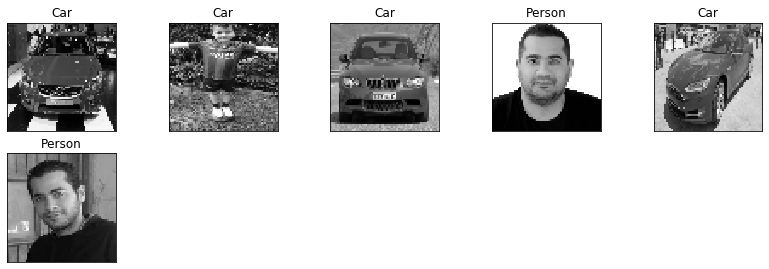

In [158]:
fig = plt.figure(figsize = (14,14))
for cnt , data in enumerate(testing_images[0 : 6]):
    y = fig.add_subplot(6 , 5 , cnt + 1 )
    img = data[0]
    data = img.reshape(1 , 64 , 64 , 1)
    model_out = model.predict([data])
    
    if(np.argmax(model_out) == 1):
        str_label = 'Car'
    else : 
        str_label = 'Person'
        
    y.imshow(img , cmap = 'gray') 
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
    
    